# **Data Mining & Foundations of AI (Assessment 1) 6CC555**

# **Developing a Predictive Model for Early Detection of Diabetes Risk Factors in Patients: An Analytical Approach Using Machine Learning** 

                                                                                 
**Student Number: 100536625** 
---

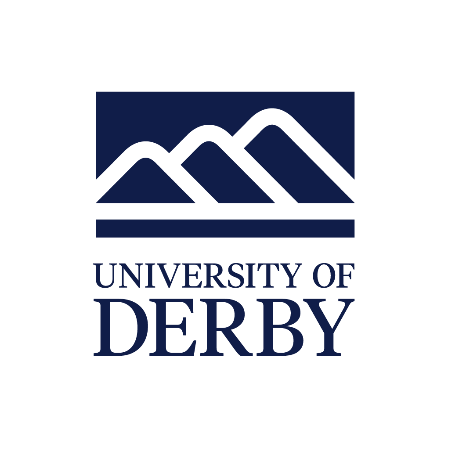

---

# Introduction

Diabetes stands out as a developing disease with serious consequences for global public health systems. According to the most recent projections, roughly 463 million people have diabetes, which is projected to rise to 700 million by 2045 (Snouffer, 2019). This chronic condition, marked by increased levels of blood glucose, leads to serious consequences if not controlled appropriately, including cardiovascular disease, renal failure, and eyesight loss, highlighting the crucial need for early identification and care (Canto et.al, 2019).

This analysis dives into the complexity of identifying diabetes risk factors in people, using a large dataset gathered from medical examinations and patient histories ('Healthcare-Diabetes.csv'). The dataset includes a diverse range of information such as plasma glucose concentration, blood pressure, body mass index (BMI), and family history of diabetes. By examining these characteristics, the project hopes to uncover patterns and connections that might considerably help in the early identification of diabetes, hence reducing its long-term health consequences.

The issue I've decided to concentrate upon: **"Developing a Predictive Model for Early Detection of Diabetes Risk Factors in Patients,"** is not just critical to the advancement of preventive healthcare strategies, but it also aligns with current research priorities in the medical and data science fields. The significance of the research stems from its ability to provide healthcare practitioners with actionable information, allowing for the development of tailored intervention strategies that can lower the occurrence of diabetes-related problems.

To tackle this issue, the project will employ a rigorous process that includes exploratory data analysis (EDA) to identify underlying patterns and insights in the data, followed by the use of multiple machine learning algorithms to forecast diabetes risk. Throughout this project it will critically examine the performance of various algorithms in order to determine the best effective model based on accuracy, sensitivity, and specificity criteria. The project's analytical journey aims to give valuable insights to the diabetes research area, supported by a rigorous examination of data-driven prediction models.

---


# Data Dictionary
This dataset encompasses a comprehensive array of variables essential for analysing diabetes risk factors:<br>

**Id**: Each patient is assigned a unique identifier, ensuring individual privacy and facilitating precise data management.<br>
**Pregnancies**: Reflects the total number of pregnancies, highlighting potential pregnancy-related diabetes risk factors.<br>
**Glucose**: Measured as plasma glucose concentration 2 hours post an oral glucose tolerance test, serving as a crucial indicator of diabetes.<br>
**BloodPressure**: Captures diastolic blood pressure in millimeters of mercury (mm Hg), a vital sign important for assessing cardiovascular health.<br>
**SkinThickness**: Triceps skin fold thickness in millimeters (mm), used to estimate body fat and insulin resistance.<br>
**Insulin**: The 2 hour serum insulin level in micro-units per milliliter (mu U/ml), providing insight into the body's insulin production and use.<br>
**BMI**: Body mass index, calculated as weight in kilograms divided by the square of height in meters (weight in kg / height in m^2), identifies overweight and obesity as diabetes risk factors.<br>
**DiabetesPedigreeFunction**: A derived score assessing the likelihood of diabetes based on family history, encapsulating genetic predisposition.<br>
**Age**: Patient's age in years, recognising age as a significant risk factor for diabetes.<br>
**Outcome**: A binary variable (0 or 1) indicating the absence or presence of diabetes, respectively, serving as the target variable for predictive modeling.<br>




---

# Importing Libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy.stats import pearsonr, spearmanr

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, log_loss, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


___

# Exploratory Data Analysis (EDA) and Pre Processing

___


# Data Visualisation


In [50]:
# Load dataset from CSV
data = pd.read_csv('Healthcare-Diabetes.csv')

# Configure pandas to display all rows
pd.set_option('display.max_rows', None)

# Display the DataFrame
display(data)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


Loading and displaying the entire DataFrame from 'Healthcare-Diabetes.csv' allows for an in-depth examination of the dataset right away in the notebook. Using pandas to show all rows allows for a deeper examination of the data, which is beneficial for early data exploration and data integrity. The output allows you to visually check every input across all columns, which aids in the detection of trends, abnormalities, or data quality concerns at a glance.

---



# Handling Missing Data

In [51]:
# Define columns where a zero value is biologically or clinically implausible, indicating missing or incorrect data
columns_of_interest = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Use lambda function to calculate the percentage of zero values for the specified columns, indicating potential data issues
zero_values = data[columns_of_interest].apply(lambda x: (x == 0).sum() / len(data) * 100)

# Similarly, calculate the actual count of zero values in these columns to understand the extent of missing/incorrect data
zero_values_count = data[columns_of_interest].apply(lambda x: (x == 0).sum())

# Print the calculated percentages of zero values for each column to identify data quality issues
print("Percentage of zero values in each column:")
print(zero_values)
print()

# Print the count of zero values for further data cleaning or imputation considerations
print("Count of zero values in each column:")
print(zero_values_count)

Percentage of zero values in each column:
Glucose           0.650289
BloodPressure     4.515896
SkinThickness    28.901734
Insulin          48.049133
BMI               1.408960
dtype: float64

Count of zero values in each column:
Glucose            18
BloodPressure     125
SkinThickness     800
Insulin          1330
BMI                39
dtype: int64


**Output Analysis**: The results show different amounts of missing data across clinical measures. Specifically, glucose levels are absent in only 0.65% (18 cases) of the sample, showing that the data for this key parameter is quite full. Blood pressure data is missing in 4.52% of cases (125), which, while considerable, is still a minor proportion of the sample. However, Skin Thickness and Insulin provide more significant issues, with 28.90% (800 occurrences) and 48.05% (1330 instances) absent, indicating considerable gaps in these parameters. BMI data is missing in just 1.41% of the entries (39 cases).

Considering the analysis, KNN imputation is selected for addressing missing variables, excluding Insulin, due to its effectiveness in leveraging patterns within similar instances for accurate missing value predictions. This method is particularly suited for clinical datasets where interrelated physiological parameters can significantly inform the imputation process (Brownlee, 2020).

However, since approximately fifty percent of the data for Insulin is missing, the decision was taken to completely eliminate this field. This severe measure is justified because excessive missing values might add considerable bias or mistakes if imputed, thereby deceiving subsequent analysis. Furthermore, the lack of approximately half of the data shows inherent flaws in Insulin data collection or reporting, rendering it unsuitable for deriving meaningful inferences or modelling without significant external validation or augmentation.

In [52]:
# Define columns for imputation (excluding 'Insulin' since it will be totally removed)
imputation_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Make a copy of the DataFrame to preserve original data
data_imputed = data.copy()

# Drop 'Insulin' column from the copied DataFrame
data_imputed.drop(columns=['Insulin'], inplace=True)

# Replace '0' values with NaN in the columns designated for imputation
data_imputed[imputation_columns] = data_imputed[imputation_columns].replace(0, np.nan)

# Apply KNN imputation to the specified columns
data_imputed[imputation_columns] = knn_imputer.fit_transform(data_imputed[imputation_columns])

# Convert 'Glucose', 'BloodPressure', and 'SkinThickness' back to integers
for column in ['Glucose', 'BloodPressure', 'SkinThickness']:
    # Use np.round() for standard rounding before conversion to int, if needed
    data_imputed[column] = np.round(data_imputed[column]).astype(int)

**Output analysis**: This code preprocesses data by entering missing values into specified columns ('Glucose', 'BloodPressure', 'SkinThickness', 'BMI') and eliminating the 'Insulin' column. It employs a K-Nearest Neighbours (KNN) Imputer, which is initialised with five neighbours, to replace missing values with the mean of the nearest neighbours found in the data. After KNN imputation for missing data, the 'Glucose', 'BloodPressure', and 'SkinThickness' columns are rounded to the nearest integer and converted to integer data types from the float data type KNN converts the values into. This ensures consistency with the original data types and prepares the dataset for analysis or modelling. The insulin column is now fully removed.

In [53]:
# Calculate summary statistics before imputation
summary_before = data[imputation_columns].describe()

# Calculate summary statistics after imputation
summary_after = data_imputed[imputation_columns].describe()

# Output summary statistics before imputation
print("Summary Statistics Before Imputation:\n", summary_before, "\n")

# Output summary statistics after imputation
print("Summary Statistics After Imputation:\n", summary_after)

# Display the first 10 rows of the specified columns before imputation
print()
print("First 10 rows before imputation:")
print(data[imputation_columns].head(10))

# Display the first 10 rows of the specified columns after imputation
print("\nFirst 10 rows after imputation:")
print(data_imputed[imputation_columns].head(10))

# Display datatypes and missing values of original data
data.info()

# Display datatypes and missing values of imputed data for comparison
data_imputed.info()

Summary Statistics Before Imputation:
            Glucose  BloodPressure  SkinThickness          BMI
count  2768.000000    2768.000000    2768.000000  2768.000000
mean    121.102601      69.134393      20.824422    32.137392
std      32.036508      19.231438      16.059596     8.076127
min       0.000000       0.000000       0.000000     0.000000
25%      99.000000      62.000000       0.000000    27.300000
50%     117.000000      72.000000      23.000000    32.200000
75%     141.000000      80.000000      32.000000    36.625000
max     199.000000     122.000000     110.000000    80.600000 

Summary Statistics After Imputation:
            Glucose  BloodPressure  SkinThickness          BMI
count  2768.000000    2768.000000    2768.000000  2768.000000
mean    121.911127      72.347905      28.819364    32.610665
std      30.559073      12.162435      10.197147     7.148620
min      44.000000      24.000000       7.000000    18.200000
25%      99.000000      64.000000      22.000000    2

**Output Analysis**: The pre- and post-imputation analyses demonstrate that data preparation was effective employing KNN imputation and the elimination of the 'Insulin' column. Before imputation, summary statistics show various 0 values in the 'Glucose', 'BloodPressure', 'SkinThickness', and 'BMI' columns, indicating missing data. Following imputation, these zeros are changed, as seen by the revised mean, standard deviation, and minimum values, demonstrating the filling of missing data. The 'SkinThickness' and 'BloodPressure' columns, in particular, exhibit significant changes in their minimum values from 0 to 7 and 24, respectively, demonstrating the efficiency of KNN in resolving missing data by using the mean of the nearest neighbours. If you look at the first 10 records before and after imputation record 7 where the 'BloodPressure' and 'SkinThickness' has been successfuly imputed using KNN being changed from 0 and 0 to 76 and 29. Record 9 demonstrates KNN being utilised for the BMI index where the original record pre imputation is 0.0 to 24.4. 

The after-imputation data displays no missing values, and the integer conversion for 'Glucose', 'BloodPressure', and 'SkinThickness' is effectively accomplished, retaining compatibility with the original data types, while the 'BMI' remains a float. The 'Insulin' column has been removed from the dataset, which aligns with the preparation aim, and the consistency of data types and effective handling of missing values show the dataset's suitability for further analysis or modelling.

___

# Histograms


Histograms provide a simple visualisation of data distribution, enabling us to examine the frequency of data points over various ranges. They are very effective in detecting skewness in data. Box plots, on the other hand, give a quartile-based representation of the data distribution and successfully highlight outliers, providing a rapid glimpse of the data's central tendency, dispersion, and probable extreme values(Chen, 2024). The Kernel Density Estimate (KDE) provided on the histograms provides a smoothed version of the histogram, allowing for a more precise identification of the distribution's structure (Pramanik, 2019). Together, these visual tools are useful for exploratory data analysis, providing complementary perspectives that lead future statistical analysis and modelling efforts.

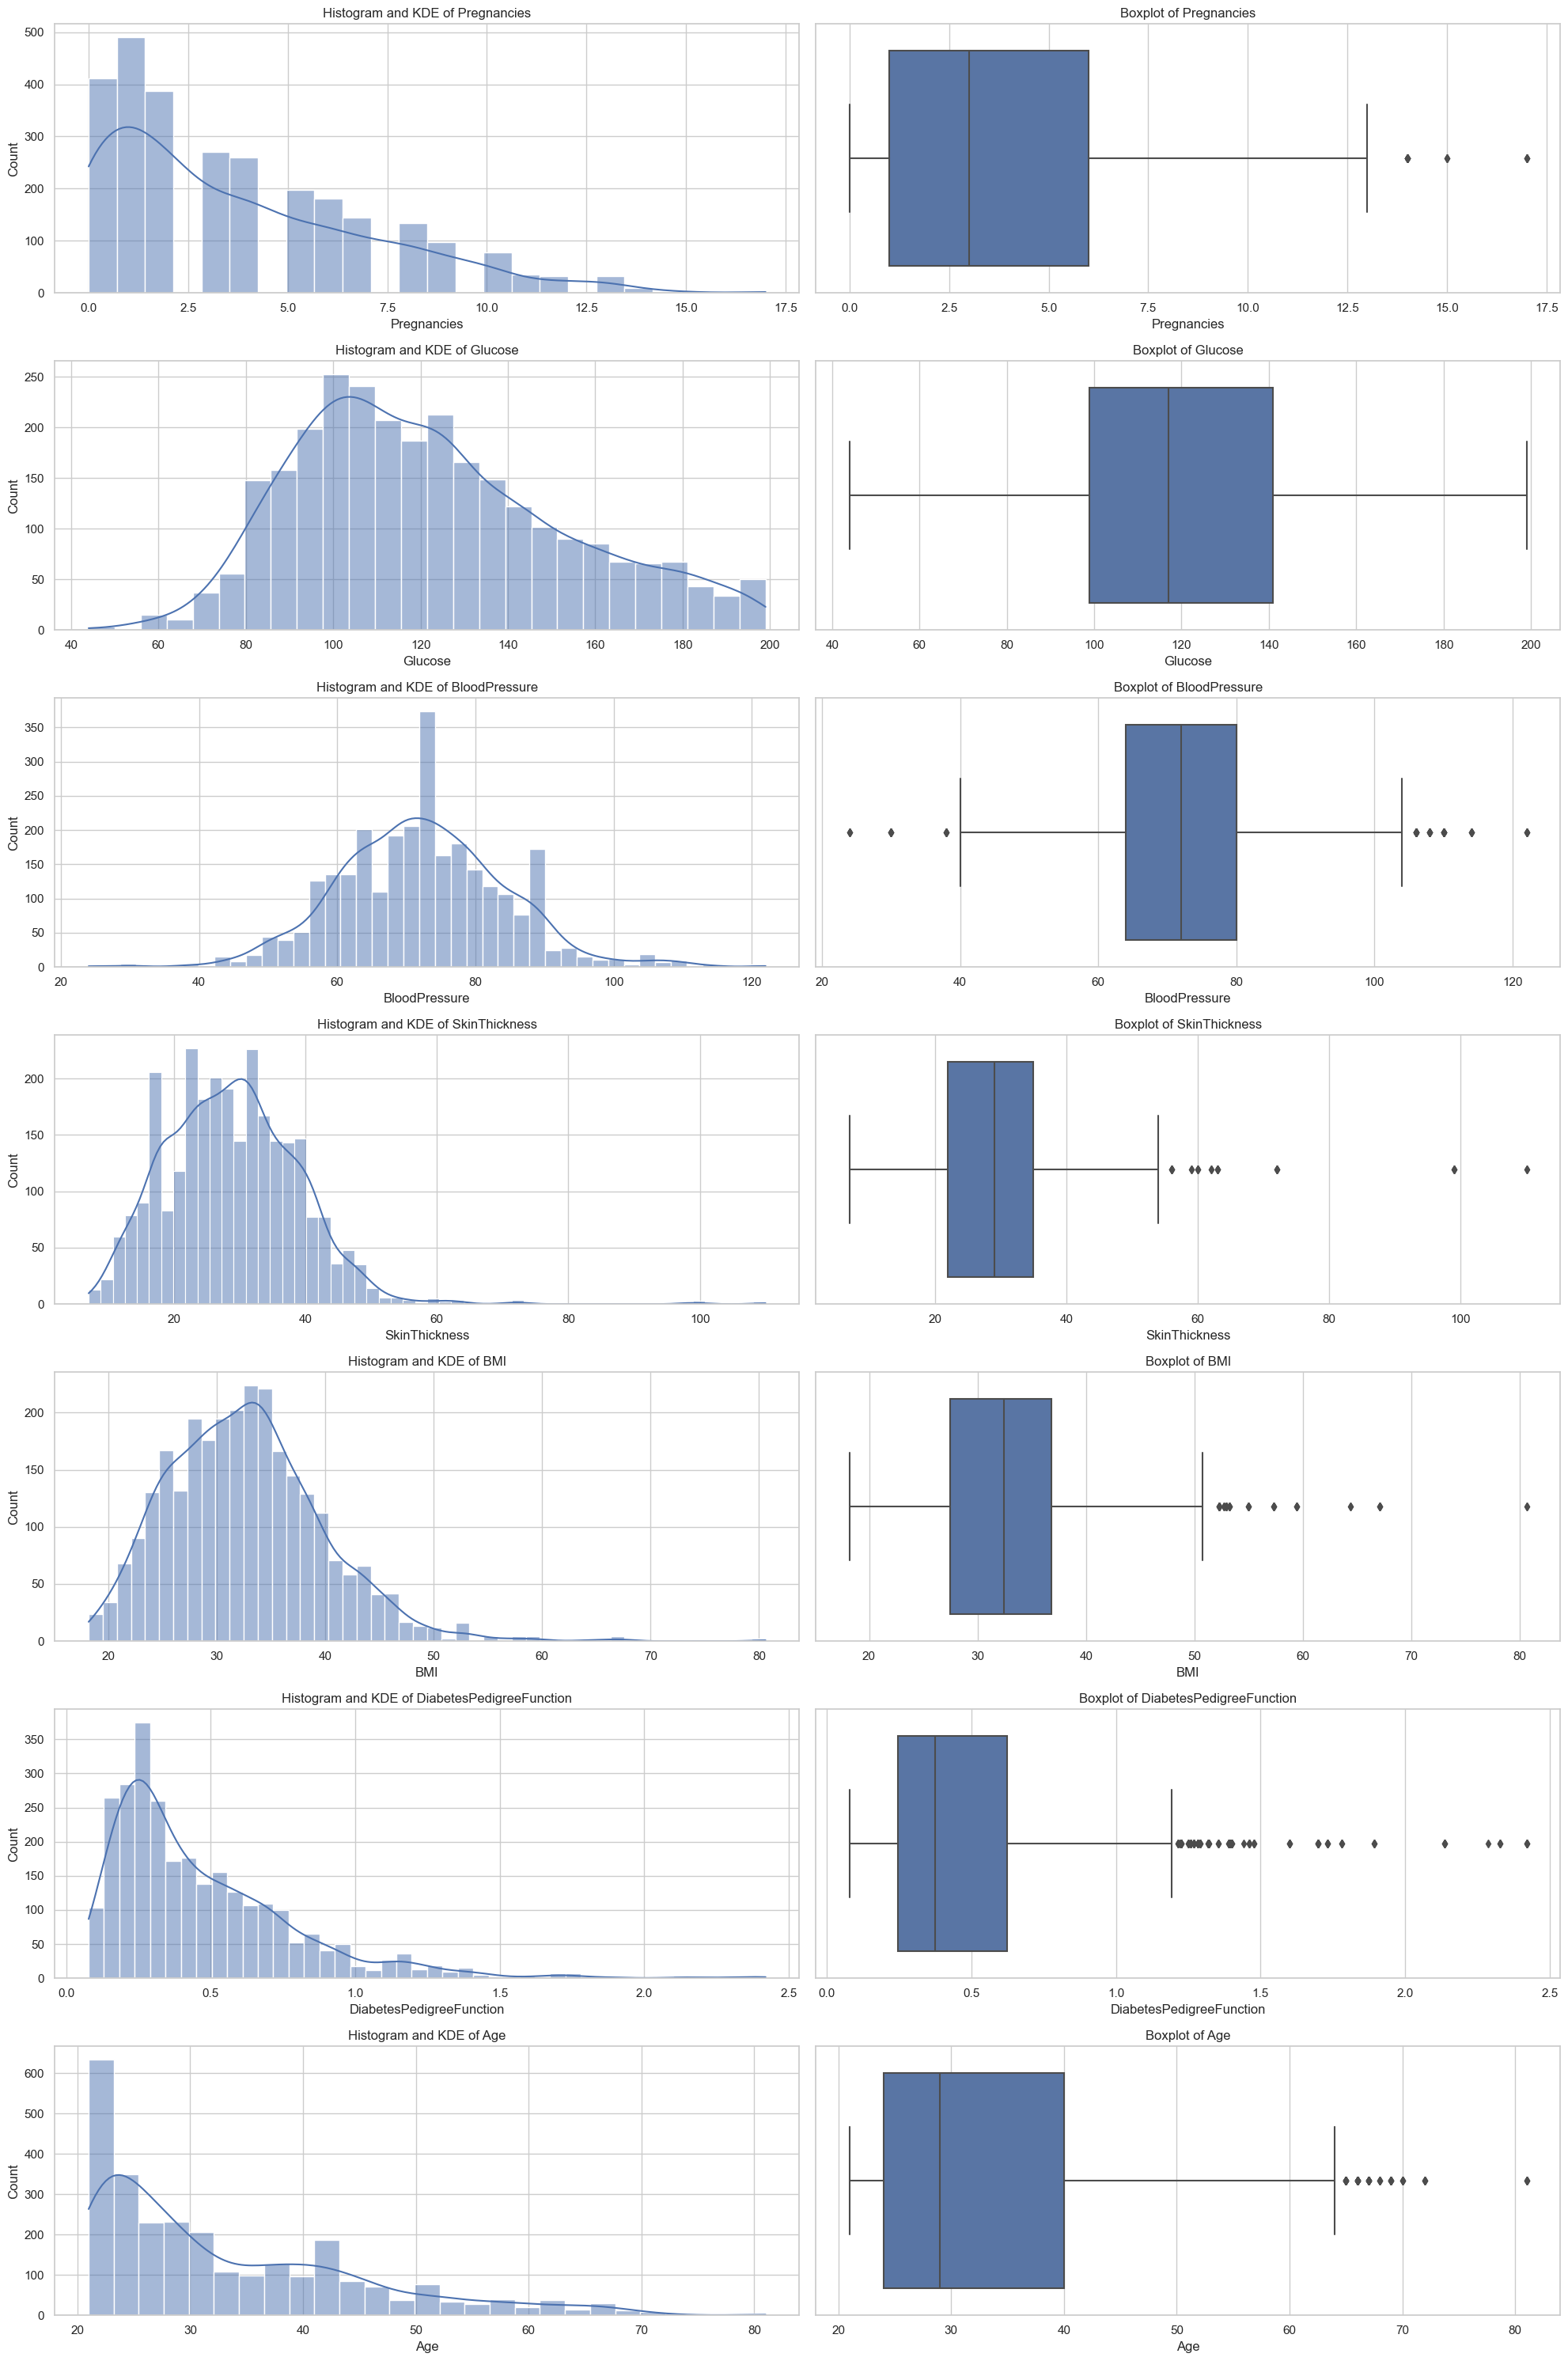

In [54]:
# Rolling call for the stats party: pregnancies to age, no feature left behind!
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Unfurling the red carpet for our features on a plot stage sized 20x30
plt.figure(figsize=(20, 30))

# Party trick: Every feature gets to shine twice - in histogram glam and boxplot charm!
for i, feature in enumerate(numerical_features, 1):
    # Setting the stage for the histogram's solo performance
    plt.subplot(len(numerical_features), 2, 2*i-1)
    sns.histplot(data_imputed[feature], kde=True)
    plt.title(f'Histogram and KDE of {feature}')
    
    # And now, a sleek boxplot walks the runway
    plt.subplot(len(numerical_features), 2, 2*i)
    sns.boxplot(x=data_imputed[feature])
    plt.title(f'Boxplot of {feature}')

# Ensuring everyone has room, no overlaps in this visual symphony!
plt.tight_layout()
plt.show()

**Output Analysis**: <br>Starting with Pregnancies, the histogram shows a right-skewed distribution, exhibiting that the majority of individuals have fewer pregnancies, with a decreasing number of people as the number of pregnancies grows. This trend is repeated in the boxplot, where the data distribution indicates heterogeneity in the number of pregnancies across the population, with some outliers suggesting people with much more pregnancies than the median.

The histogram illustrates a generally usual glucose distribution, with the majority of people having glucose levels in the medium range, but tails indicate the occurrence of lower and higher glucose levels as well. The boxplot for glucose shows no notable outliers, indicating that extreme glucose levels are uncommon in the sample, and the median accurately represents the central trend.

Moving on to Blood Pressure, the histogram again indicates a distribution that is roughly normal, with a concentration of values around a centre range and fewer people with extremely low or extremely high blood pressure. The boxplot verifies this, with a symmetric distribution around the median, while a few outliers on the lower end point to people with exceptionally low blood pressure.

The histogram for Skin Thickness reveals a substantial right skew, with a large proportion of people having lower skin thickness readings and a lengthy tail to higher values. This skewness towards lower values is visible in the boxplot, which shows a number of outliers on the upper end, suggesting people with exceptionally high skin thickness measurements.

BMI follows a similar pattern with a right-skewed distribution, indicating that while the majority of people have a BMI in the moderate range, a considerable fraction of the population has a higher BMI. This finding is reinforced by the boxplot, which displays outliers at the upper end, indicating the presence of people with much higher BMI.

The Diabetes Pedigree Function histogram shows a significantly right-skewed distribution, indicating that the majority of people have lower values for this trait, with a large tail with higher values. The boxplot shows multiple outliers, indicating a variance in diabetes pedigree function between people, with some having significantly higher values.

Finally, the Age distribution, as demonstrated by the histogram, demonstrates that the dataset is primarily composed of younger people, with frequency gradually decreasing as age increases. The age boxplot reveals a somewhat symmetrical distribution around the median, but it also contains outliers on the higher end, indicating the presence of older individuals in the sample.

___

# Correlation Matrix with Heatmap

A correlation matrix with a heatmap is a useful statistical tool that visualises the correlation coefficients between pairs of variables in a dataset. By mapping these correlations into a square matrix, with each element representing the correlation between two variables ranging from -1 to 1, we can get a clear picture of how variables connect to one another. Positive numbers close to 1 show a strong positive correlation, implying that as one variable grows, so does the other, whereas negative values near -1 indicate a strong negative correlation, implying an inverse link. A number around zero indicates that the variables have little to no linear connection (Zach, 2020).

The inclusion of a heatmap brings this matrix to life, with colour gradients displaying the strength and direction of these relationships. This enables the rapid identification of strongly correlated variables, assisting in exploratory data analysis by suggesting interesting topics for additional inquiry or revealing redundant variables that may compromise model performance due to multicollinearity. As a result, correlation matrices with heatmaps are critical in the preprocessing stage of data analysis and machine learning, guiding feature selection and improving overall knowledge of the complex relationships in the data (Kumar 2022).

In [55]:
# Calculate the correlation matrix
correlation_matrix = data_imputed.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate the heatmap
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.index.tolist(),
    annotation_text=correlation_matrix.values.round(2),
    colorscale='RdBu',
    showscale=True
)

# Update layout
fig.update_layout(
    title='Interactive Correlation Matrix with Heatmap',
    xaxis=dict(tickangle=-45),
    yaxis=dict(tickangle=45)
)

# Show the plot
fig.show()

**Output Analysis**: <br>
Glucose and Outcome: The heatmap shows a strong positive relationship (0.49) between glucose levels and diabetes outcomes, emphasising the significance of glucose levels as a key indication of diabetes risk. This is consistent with medical thinking, which recognises glucose levels as a major element in the evaluation of diabetes risk.<br>

Age and Pregnancy: There is a significant positive correlation (0.54) between age and the number of pregnancies, indicating that in this dataset, age is connected with an increase in the number of pregnancies. This association may reflect the features of the demographic and sample population under study.<br>

Skin Thickness and Outcome: Skin thickness has a somewhat favourable (0.26) relationship with diabetes outcomes. Increased skin thickness may indicate increased insulin resistance, a recognised risk factor for diabetes. This might indicate underlying physiological mechanisms influencing both skin thickness and metabolic health.<br>

BMI, Blood Pressure, Skin Thickness, and Glucose: BMI has a positive correlation with blood pressure (0.28), skin thickness (0.63), and glucose (0.23). These interrelationships demonstrate BMI's interaction with several health indicators and diabetes risk factors, emphasising the importance of body mass index in overall metabolic health and disease risk assessment.<br>

Diabetes Pedigree Function and Outcome: The Diabetes Pedigree Function demonstrates a moderate positive association (0.16) with diabetes outcomes, suggesting the importance of hereditary variables in diabetes risk. This association emphasises the multifaceted aspect of diabetes, which includes genetics, lifestyle, and physiological characteristics.<br>

Age and Outcome: There is a positive correlation (0.24) between age and diabetes outcomes, meaning that diabetes risk increases with age. This discovery is congruent with recognised medical insights, which highlight age as a substantial risk factor for diabetes.<br>

The correlation matrix analysis gives a more sophisticated knowledge of the correlations between numerous factors and their possible influence on diabetes outcomes. By combining physiological data, genetic predispositions, and demographic information, we obtain insight into the intricate interplay of variables that contribute to diabetes risk. These findings not only shed light on individual risk factors, but also pave the way for the creation of personalised medical therapies and public health efforts focused at diabetes prevention and control.<br>


___

# Pair Plot

A pair plot is a data visualisation tool that shows scatterplots for each pairwise combination of variables in a dataset, as well as histograms or density plots on the diagonal for individual variable distributions. It enables the rapid discovery of correlations, trends, and outliers in data, making it an indispensable tool for exploratory data analysis and preliminary research (Sarath, 2022).

/Users/adamiqbal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



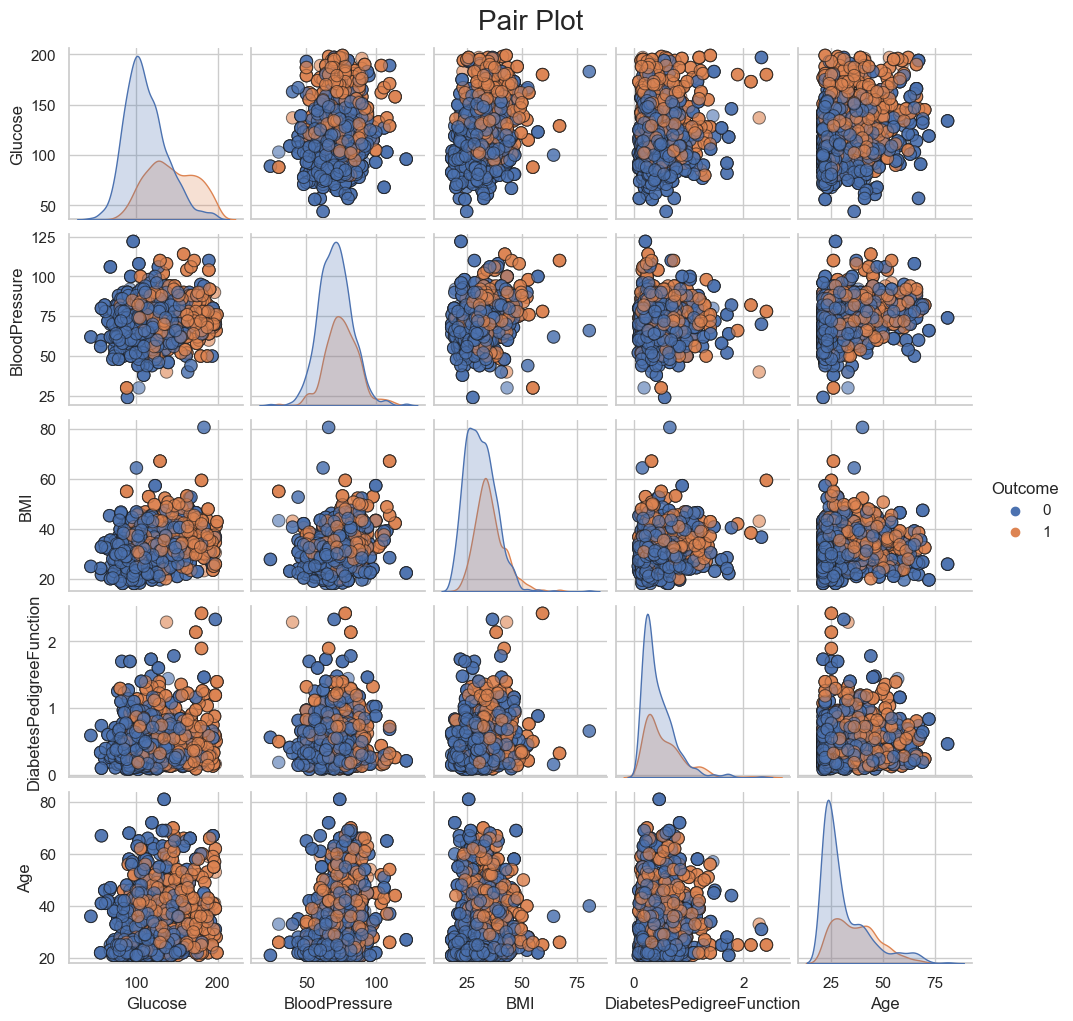

In [56]:
# Selecting a subset of the dataset for the pair plot
features = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Using seaborn's pairplot function to create the plot
sns.pairplot(data_imputed[features], hue='Outcome', diag_kind='kde', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'}, height=2)

plt.suptitle("Pair Plot", size=20, y=1.02)

# Show the plot
plt.show()

**Output Analysis** <br>
Glucose Levels: Individuals with diabetes (Outcome 1) have higher glucose levels, as seen by the tightly packed orange spots with higher glucose readings. This verifies the relationship between high blood glucose levels and diabetes. <br>

Blood Pressure: While there is considerable overlap between the two outcomes, there is a clear clustering of diabetic persons at higher blood pressure levels, indicating a link between high blood pressure and diabetes. <br>

BMI: There is a definite tendency of increasing BMI being connected with diabetes, as evidenced by a greater concentration of orange points at higher BMI levels. This adds to the awareness that having a higher BMI might increase the chances of developing diabetes. <br>

Diabetes Pedigree Function: Although there is substantial overlap, persons with diabetes have a little more distributed distribution towards higher values of the Diabetes Pedigree Function, suggesting that genetic predisposition plays a role in diabetes risk. <br>

Age: The scatterplot indicates that the incidence of diabetes increases with age (Outcome 1). However, age alone is not a reliable indication because many younger people have diabetes and many older people don't. <br>

In conclusion, the pair plot supports numerous established connections with diabetes, including glucose levels, BMI, and age, and emphasises the potential genetic component suggested by the Diabetes Pedigree Function. These visual insights are critical for constructing prediction models and understanding the interactions of numerous diabetes risk variables.

___

# Feature Importance Using Random Forrest Classifier

Feature importance analysis is an important phase in predictive model development since it provides information on the relative relevance of each predictor in relation to the model's result. It aids in determining which characteristics have the most effect on the predicted accuracy of the model, directing feature selection and engineering to improve model performance. Using approaches like the Random Forest Classifier, we can quantify each variable's contribution to the model, allowing us to prioritise the most significant predictors. This not only improves the model's efficiency, but also offers a greater knowledge of the underlying data structure and the dynamics that influence the anticipated outcome (Genuer et al., 2010). The graphical depiction of feature significance improves the model's interpretability, improving communication of findings to stakeholders and helping to evidence-based decision-making (Louppe et al., 2013).

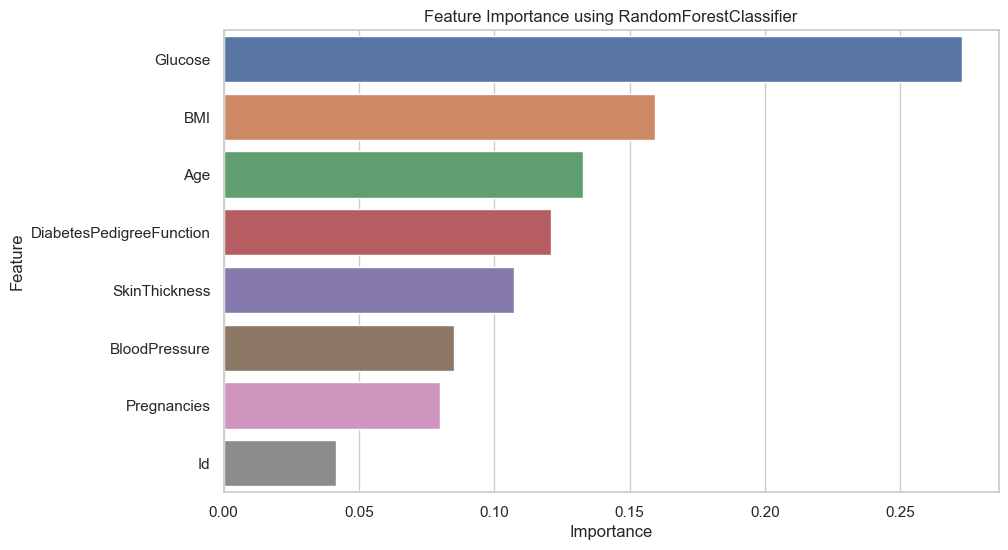

In [57]:
# Preparing the data
X = data_imputed.drop('Outcome', axis=1)  # Features
y = data_imputed['Outcome']  # Target variable

# Splitting data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train1, y_train1)

# Getting feature importances
feature_importances = rf_model.feature_importances_

# Creating a DataFrame for visualisation
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance using RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Output Analysis**:

Glucose Levels: The graph shows a strong predictive association between glucose levels and the chance of diabetes, which is a key component of diabetes diagnosis. Higher glucose levels normally imply an increased risk of diabetes, and this feature's prominence in the model emphasises its importance in predicting the outcome.

BMI: The body mass index is the second most important factor, supporting the well-known association between body weight and diabetes. A greater BMI is frequently connected with an increased risk of type 2 diabetes due to the link to insulin resistance. The model's emphasis on BMI as a predictor is consistent with current medical understanding that controlling body weight is an important element in diabetes prevention and treatment.

Age: Age is another important factor in diabetes risk, as seen by its prominence in the feature ranking. The chance of acquiring diabetes increases with age owing to a variety of variables such as decreasing physical activity, weight gain, and the body's lower sugar tolerance. This feature's high rating indicates age as a major predictor in diabetes risk prediction.

Diabetes Pedigree Function: This measure of hereditary vulnerability is significant, but less so than the top three traits. It implies that family history and genetic variables influence diabetes risk, however they may not be as obvious as glucose levels or BMI. Nonetheless, this highlights the multifaceted character of diabetes, in which genetics might play a role.

Skin Thickness: The lesser relevance of skin thickness may indicate a less direct association with diabetes than other variables. Skin thickness is associated with insulin resistance and may indicate underlying metabolic abnormalities, however it is a less direct indicator than glucose levels or BMI.

Blood Pressure: Despite its lower position in feature relevance, blood pressure is still a significant characteristic. Hypertension is known to coexist with diabetes, and the cardiovascular strain it causes can contribute to the condition. The model acknowledges its importance, but assigns less predictive power to blood pressure than to glucose, BMI, or age.

Pregnancies had a reduced relative relevance in this model, indicating that they may be a more specific predictor for a subgroup of the population, such as women of reproductive age. This might indicate that the trait is more significant for gestational diabetes than for overall diabetes risk across all populations.

Id: As predicted, the 'Id' characteristic has no predictive value in diabetes, consistent with the concept that an identifying number is neither a clinical or biological determinant and hence does not add to diabetes risk.

In conclusion, this feature significance chart emphasises diabetes's complexity as a diverse health disease impacted by a variety of elements, some of which are more important than others. The study emphasises the significance of using a comprehensive approach to measuring diabetes risk, including glucose, BMI, age, and family history. Understanding the importance of each aspect can help guide more targeted screening and interventions, resulting in improved health outcomes and more personalised patient care.

___

# Outcome Analysis

In the following section, I look at the distribution of diabetes outcomes throughout the dataset. I use a bar chart, histogram, and kernel density plot to compare the prevalence of non-diabetic (Outcome 0) and diabetic (Outcome 1) cases, as well as to evaluate the affect of Age, Glucose, Blood Pressure, Diabetes Pedigree Function, BMI, Skin Thickness, Pregnancies on the outcome.


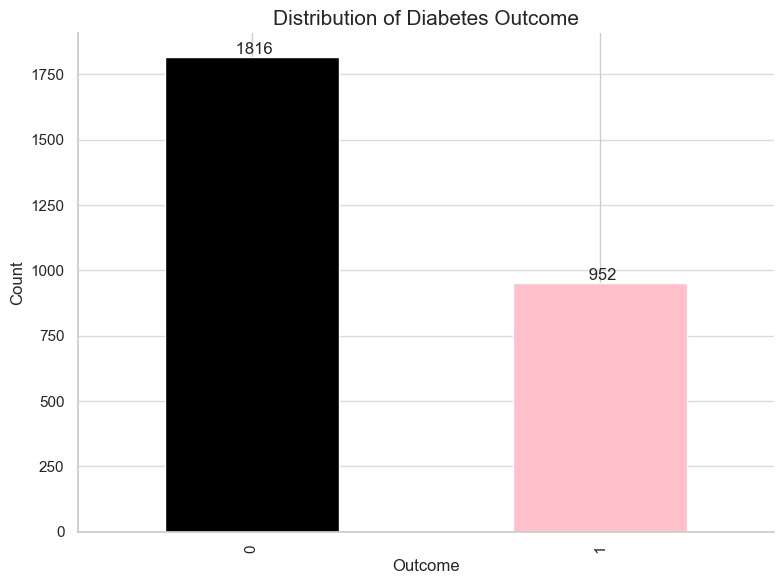

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))
outcome_counts = data_imputed['Outcome'].value_counts()
outcome_counts.plot(kind='bar', ax=ax, color=['black', 'pink'])

# Add data labels to the bars
for i, value in enumerate(outcome_counts):
    ax.text(i, value, f' {value}', ha='center', va='bottom')

# Set the title and labels
ax.set_title('Distribution of Diabetes Outcome', fontsize=15)
ax.set_xlabel('Outcome', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Add grid lines for better readability
ax.grid(axis='y', linestyle='-', alpha=0.7)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


**Output Analysis**:
The bar chart depicts the distribution of diabetes outcomes across a dataset. It displays two results: '0' (marked by a black bar) and '1' (shown by a blue bar), which reflect non-diabetic (black bar) and diabetic (blue bar) categories, respectively. The non-diabetic results are much greater (1816) than the diabetes ones (952). This means that the number of non-diabetic occurrences in the dataset nearly doubles the number of diabetes cases.

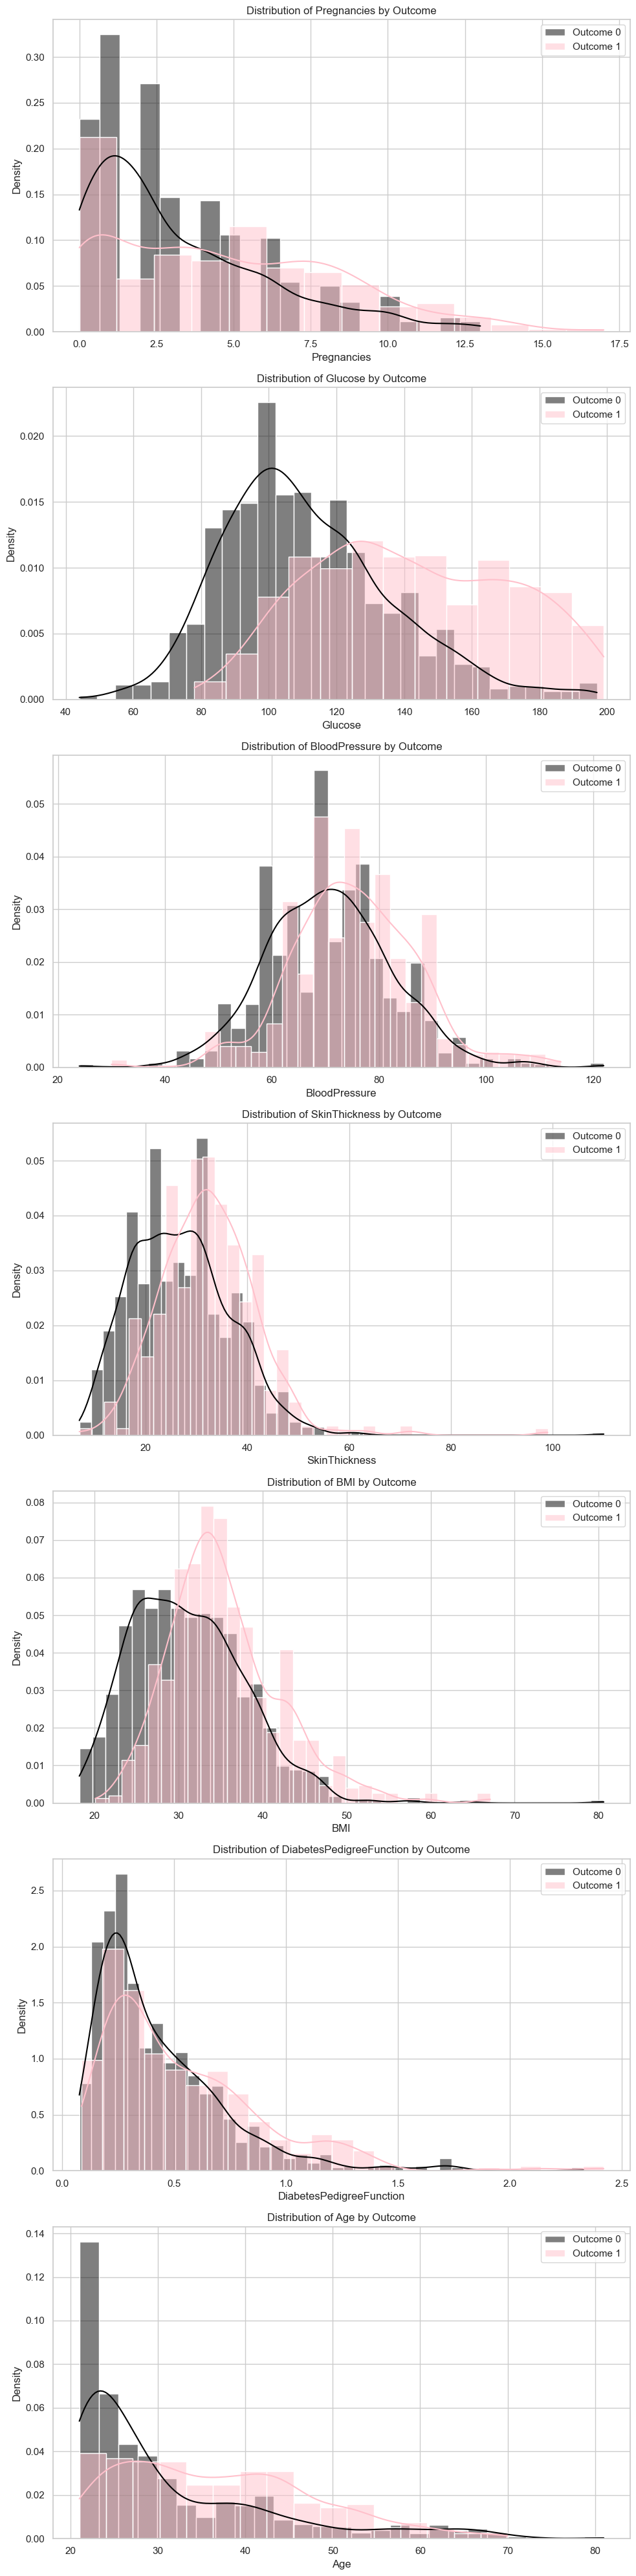

In [59]:
# Setting aesthetic parameters for seaborn
sns.set_theme(style="whitegrid")

# Variables to be included in the density plots
variables_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Initialize a subplot with 7 rows for each variable
fig, axes = plt.subplots(nrows=len(variables_to_plot), ncols=1, figsize=(10, 40))

# Iterate over each variable to create a density plot
for i, var in enumerate(variables_to_plot):
    # Creating density plots for Outcome 0
    sns.histplot(data=data_imputed[data_imputed['Outcome'] == 0], x=var, color="black", label='Outcome 0', kde=True, ax=axes[i], stat="density")
    
    # Creating density plots for Outcome 1
    sns.histplot(data=data_imputed[data_imputed['Outcome'] == 1], x=var, color="pink", label='Outcome 1', kde=True, ax=axes[i], stat="density")
    
    # Setting the title for each subplot
    axes[i].set_title(f'Distribution of {var} by Outcome')
    
    # Adding a legend to each subplot
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Output Analysis**: <br>
Distribution of Pregnancy by Outcome: The graph indicates a right-skewed distribution for both outcomes, with a greater concentration of data for individuals without diabetes (Outcome 0) in the lower pregnancy count range. The frequency of diabetes (Outcome 1) appears to rise with the number of pregnancies, implying a link between the two, which might be due to prenatal diabetes or the development of type 2 diabetes after pregnancy. <br>

Distribution of Glucose by Outcome: There is a significant discrepancy between the two outcomes, with diabetics (Outcome 1) often having higher glucose levels. This underscores the well-established association between high glucose levels and diabetes. The overlap is modest, suggesting that glucose levels can be a reliable predictor of diabetes.<br>

Distribution of Blood Pressure by Outcome: The distribution of blood pressure for both outcomes is rather similar, yet those who have diabetes (Outcome 1) tend to have somewhat higher blood pressure values. The distributions for both groups are reasonably normal, suggesting that blood pressure alone may not be a reliable predictor of diabetes but may be a contributing factor. <br>

Distribution of Skin Thickness by Outcome: This graph shows a moderate difference between the two results, with a little tendency towards thicker skin for diabetics (Result 1). The overlap is large, suggesting that, while skin thickness has some association with diabetes, it is not as strong as other markers such as glucose levels. <br>

Distribution of BMI by Outcome: Individuals with diabetes (Outcome 1) had higher BMI values, as seen by the right-skewed distribution, which is consistent with medical understanding that a higher BMI is a risk factor for diabetes. The significant overlap for lower BMI values indicates that, while BMI is a risk factor, it is not the sole predictor of diabetes status.<br>

Distribution of Diabetes Pedigree Function by Outcome: The distribution demonstrates that those with a higher Diabetes Pedigree Function are more likely to get diabetes (Outcome 1), however the effect is less pronounced when compared to glucose and BMI. The occurrence of diabetes in people with lower scores indicates that, while family history is essential, it is only one of several variables that contribute to diabetes risk.<br>

Distribution of Age by Outcome:The age distribution shows that older age groups have a higher prevalence of diabetes (Outcome 1), indicating the increased risk of diabetes with age. The large number of young people with diabetes demonstrates that, while age is a role, diabetes may strike any age group.<br>

In conclusion, these histograms and kernel density plots show that some parameters, such as glucose levels and BMI, are more strongly connected with diabetes outcomes than others, such as blood pressure and skin thickness. The study also emphasises diabetes's complex character, in which a variety of genetic, physiological, and lifestyle variables interact to determine disease risk and prevalence. Each element contributes to varied degrees, and knowing their cumulative influence is critical for developing prediction models and diabetic management options.

___

# Pearsons and Spearmans Correlation Analysis

Pearson's correlation analysis, frequently referred to as the Pearson product-moment correlation coefficient, examines the linear relationship between two continuous variables. It measures the relationship between changes in one variable and changes in another, either in the same or opposite direction, on a scale of -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 signifying no linear link. This coefficient is often used for data that follow a bivariate normal distribution, however for non-normally distributed data, ordinal data, or data with important outliers, the Spearman rank correlation can also be employed (Schober, Boer, Schwarte, 2018).

Spearman's correlation analysis, often known as Spearman's rank correlation, is a non-parametric method used to analyse the monotonic connection between two variables. Unlike Pearson's correlation, it does not assume a linear connection between the variables or that the variables are assessed on interval scales, making it appropriate for ordinal data. Spearman's correlation works by rating the data and then measuring how strongly the rankings between the two variables relate to each other, which may range from -1 to +1 (Hauke, Kossowski, 2011).

Pearson's and Spearman's correlation analyses are both useful for understanding the connections between variables, with each having benefits depending on the type and distribution of the data. Pearson's correlation is favoured for linear correlations with normally distributed data, whereas Spearman's correlation is better suited for ordinal data or nonlinear interactions between variables. Using both methodologies can provide a thorough picture of the interactions between variables, highlighting both linear and monotonic correlations, allowing researchers to draw more nuanced conclusions about their data (Schober, Boer, Schwarte, 2018).

In [60]:
# Initialize lists to store results
pearsons_correlations = []
spearmans_correlations = []

# List of feature columns (excluding the 'Outcome' and 'Id' columns)
feature_columns = data_imputed.columns.drop(['Outcome', 'Id'])

# Perform Pearson's and Spearman's correlation analysis for each feature against the 'Outcome' variable
for column in feature_columns:
    # Calculate Pearson's correlation
    pearson_corr, _ = pearsonr(data_imputed[column], data_imputed['Outcome'])
    pearsons_correlations.append((column, pearson_corr))
    
    # Calculate Spearman's correlation
    spearman_corr, _ = spearmanr(data_imputed[column], data_imputed['Outcome'])
    spearmans_correlations.append((column, spearman_corr))

# Convert results to DataFrame for better readability
pearsons_df = pd.DataFrame(pearsons_correlations, columns=['Feature', 'Pearson Correlation'])
spearmans_df = pd.DataFrame(spearmans_correlations, columns=['Feature', 'Spearman Correlation'])

print(pearsons_df)
print()
print(spearmans_df)

                    Feature  Pearson Correlation
0               Pregnancies             0.223796
1                   Glucose             0.485461
2             BloodPressure             0.185679
3             SkinThickness             0.259596
4                       BMI             0.287778
5  DiabetesPedigreeFunction             0.160664
6                       Age             0.237050

                    Feature  Spearman Correlation
0               Pregnancies              0.196245
1                   Glucose              0.475355
2             BloodPressure              0.194612
3             SkinThickness              0.273450
4                       BMI              0.295458
5  DiabetesPedigreeFunction              0.156077
6                       Age              0.310080


**Ouput Analysis**: <br>
Pearson's Correlation Analysis: <br>
Glucose (0.4855) enjoyed the strongest correlation with diabetes outcomes, showing a strong linear association. This implies that increased glucose levels are strongly related with the existence of diabetes. <br>

BMI (0.2878) and age (0.2371) both reveal positive associations, showing that having a higher body mass index and being older are related with an increased risk of diabetes. <br>

SkinThickness (0.2596) and BloodPressure (0.1857) exhibit modest correlations, indicating a smaller but still significant link with diabetes outcomes.<br>

Pregnancies (0.2238) and DiabetesPedigreeFunction (0.1607) had positive but smaller correlations, suggesting a less linear association with diabetes outcomes.<br>

Spearman's Correlation Analysis:<br>
Age (0.3101) and BMI (0.2955) has the greatest Spearman correlations, indicating a substantial rank relationship with diabetes outcomes. This indicates that when age and BMI rise, so does the risk of diabetes, accounting for non-linear trends.<br>

Even after accounting for non-linear interactions, glucose (0.4754) remained substantially associated, maintaining its solid correlation with diabetes outcomes.<br>

Skin thickness (0.2734) and blood pressure (0.1946) had modest Spearman correlations, indicating non-linear connections with diabetes outcomes.<br>

Pregnancies (0.1962) and DiabetesPedigreeFunction (0.1561) had the lowest correlations, indicating weaker relationships with the outcome variable.<br>

Comparative Analysis: <br>
Both studies highlight glucose as a critical component in diabetes prediction, demonstrating its significance in both linear and non-linear models.<br>

BMI and age are continuously found as important predictors of diabetes in both Pearson's and Spearman's studies, highlighting their importance in diabetes risk.<br>

The correlation values for SkinThickness and BloodPressure fluctuate between Pearson's and Spearman's, indicating that these variables may have a non-linear association with diabetes outcomes.<br>

Pregnancy and DiabetesPedigreeFunction shows smaller correlations in both studies, indicating that these characteristics are less predictive of diabetes than others.<br>

In conclusion, the findings emphasise the importance of glucose, BMI, and age as significant predictors of diabetes. The results also emphasise the necessity of taking into account both linear and nonlinear interactions when analysing health data. Variables like SkinThickness and BloodPressure show varying degrees of linkage in linear vs rank correlations, indicating complicated associations with diabetes outcomes that require additional exploration.

___

# Exploratory Data Analysis (EDA) and Pre Processing Conclusion

The Exploratory Data Analysis (EDA) carried out in this section established a strong foundation for the development of a predictive model aiming at early detection of diabetes risk factors.  The investigation employed a thorough and diverse approach, combining visualisations such as histograms, box plots, and pair plots with statistical tools such as correlation matrices and feature significance rankings. These approaches were chosen not just for their ability to identify underlying patterns and correlations in data, but also for their consistency and transparency in delivering explainable outcomes. Each step of the EDA was properly recorded and discussed, ensuring that the reasoning for the findings was clear and understandable.

The pre-processing decisions implemented during this step were driven by a thorough grasp of the dataset and its unique characteristics. For instance, the decision to use KNN imputation for missing values—excluding the insulin variable due to its high fraction of missing data—was reached after thorough analysis of the influence on model correctness and integrity. The choice to exclude specific variables was based on a mix of statistical analysis and actual knowledge of diabetes risk factors, ensuring that the model was not mislead by noise or unnecessary data. These explanations were expressed clearly, offering a comprehensive glimpse into the key early decisions that create the cornerstone of predictive modelling.

Building on the EDA results, the paper provided solution options and potential future directions for the predictive model. The identification of critical factors and their correlations to diabetes outcomes influenced the approach to feature selection, emphasising the significance of a thorough grasp of the disease's complexities. The EDA's findings were not only displayed in a static format, but also used to provide smart, data-driven solutions for early diabetes risk diagnosis. This link between analysis and application emphasises the EDA's significance not just as a preparatory step, but also as an important phase that informs and drives the later model creation process.

In conclusion, the EDA undertaken in this study was both extensive and insightful, applying a variety of methodologies to achieve a solid grasp of the data at hand. The comprehensive justification of pre-processing decisions, as well as the forward-looking discussion of solution options based on the EDA's results, highlight the thoughtful approach used throughout this research. This study establishes a firm foundation for the predictive model's development, ensuring that it is based on a thorough and nuanced understanding of the dataset and the health condition it aims to solve.
___



# Regression or Classification Analysis and Solution 

___

# Spliting of Training and Test Data

In predictive modelling for regression or classification, data is frequently divided into training (70%) and test (30%) sets. This split seeks to strike a compromise between abundant training data for model correctness and adequate testing data for performance validation Vrigazova (2021) . This shows how adjusting this fraction can improve model performance, highlighting the importance of data partitioning in model building. The 70/30 split is a popular approach that guarantees models are neither underfit nor overfit, resulting in accurate and generalizable results.

In [61]:
# Splitting the dataset into training and testing sets
X = data_imputed.drop('Outcome', axis=1)  # Features
y = data_imputed['Outcome']  # Target variable

# Splitting the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying the sizes of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((1937, 8), (831, 8), (1937,), (831,))

**Output Analysis**:
Through splitting the dataset, I managed to allocate 70% (1,937 entries) for training and 30% (831 entries) for testing, ensuring that both the features and target variables were proportionately distributed.

___

# Logistic Regression

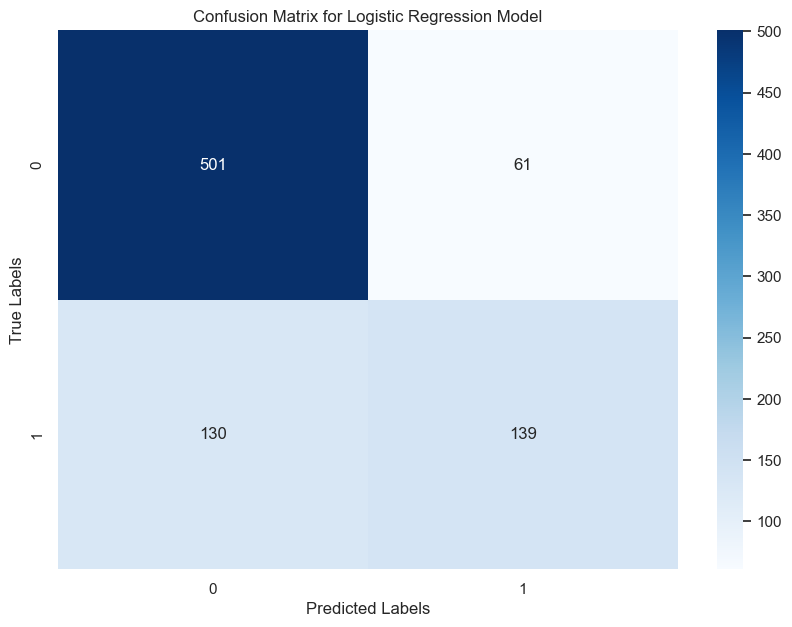

Training Accuracy: 0.76
Test Accuracy: 0.77
Precision: 0.69
Recall: 0.52
F1 Score: 0.59

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.79      0.89      0.84       562
     Class 1       0.69      0.52      0.59       269

    accuracy                           0.77       831
   macro avg       0.74      0.70      0.72       831
weighted avg       0.76      0.77      0.76       831



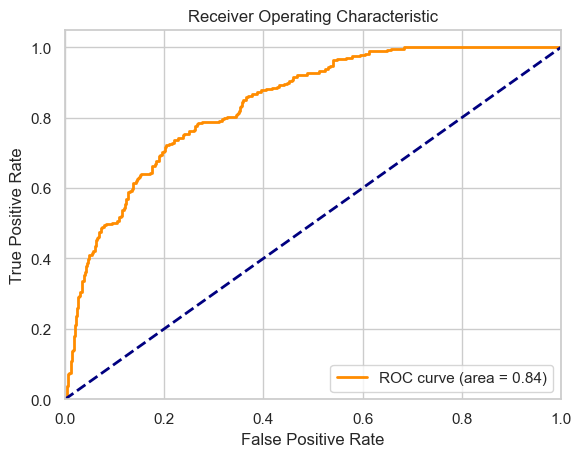

Log Loss: 0.46
AUC Score: 0.84


In [62]:
# Initialise the logistic regression model
logistic_reg_model = LogisticRegression(max_iter=1000)

# Train the model using the training set
logistic_reg_model.fit(X_train, y_train)

# Predict on the training set and the test set
y_logistic_pred_train = logistic_reg_model.predict(X_train)
y_logistic_pred_test = logistic_reg_model.predict(X_test)

# Calculate accuracy on the training set and the test set
accuracy_train_log = accuracy_score(y_train, y_logistic_pred_train)
accuracy_test_log = accuracy_score(y_test, y_logistic_pred_test)

# Calculate precision, recall, and F1 score for the test set
precision_test_log = precision_score(y_test, y_logistic_pred_test)
recall_test_log = recall_score(y_test, y_logistic_pred_test)
f1_score_test_log = f1_score(y_test, y_logistic_pred_test)

# Confusion matrix for the test set
confusion_mat_log = confusion_matrix(y_test, y_logistic_pred_test)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_log, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display basic performance metrics
print(f"Training Accuracy: {accuracy_train_log:.2f}")
print(f"Test Accuracy: {accuracy_test_log:.2f}")
print(f"Precision: {precision_test_log:.2f}")
print(f"Recall: {recall_test_log:.2f}")
print(f"F1 Score: {f1_score_test_log:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_logistic_pred_test, target_names=['Class 0', 'Class 1']))

# ROC Curve and AUC
y_probablity_positive_test_log = logistic_reg_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_probablity_positive_test_log)
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure()
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Log Loss
log_loss_value_log = log_loss(y_test, y_prob_test)
print(f"Log Loss: {log_loss_value_log:.2f}")

# AUC Score
auc_score_log = roc_auc_score(y_test, y_prob_test)
print(f"AUC Score: {auc_score_log:.2f}")

**Ouput Analysis**:
The result offers a more detailed assessment of the logistic regression model's performance. With a training accuracy of 76% and a test accuracy of 77%, the model performs consistently across new data. Precision for predicting diabetes (Class 1) is 0.69, showing a reasonable proportion of true positives among positive predictions, but precision for non-diabetes predictions (Class 0) is greater at 0.79. The recall for Class 0 is high at 0.89, indicating that the model is good at recognising genuine negatives, while the recall for diabetes cases is 0.52, implying that approximately half of all diabetes cases are missed.

The F1 score for Class 1 is 0.59, which might be improved, particularly in a medical diagnostic setting where missing actual cases can be essential. The F1 score for Class 0 is a solid 0.84, demonstrating a high level of accuracy in categorising non-diabetes patients. The national average F1 score is 0.77, indicating a balanced performance across both classes.

The Receiver Operating Characteristic (ROC) curve has an Area Under the Curve (AUC) of 0.84, which is pretty satisfactory. An AUC close to 1 implies a model with a high degree of separability between classes. However, the Logistic Loss of 0.46 suggests that there is still a significant amount of prediction error that may be decreased.

Overall, while the model has strong accuracy and the capacity to discriminate between groups, it tends to forecast non-diabetes. This might be concerning for medical diagnostics since it implies that the model should be used as an initial screening tool rather than a definitive diagnostic tool, given its present sensitivity limits in recognising all positive diabetes cases. Further model tweaking, as well as the incorporation of more relevant characteristics or more complex modelling approaches, may enhance the model's recall for diabetes predictions without considerably losing precision.

___

# Linear Regression

Training Mean Square Error: 0.16
Training R^2: 0.31
Test Mean Square Error: 0.15
Test R^2: 0.30


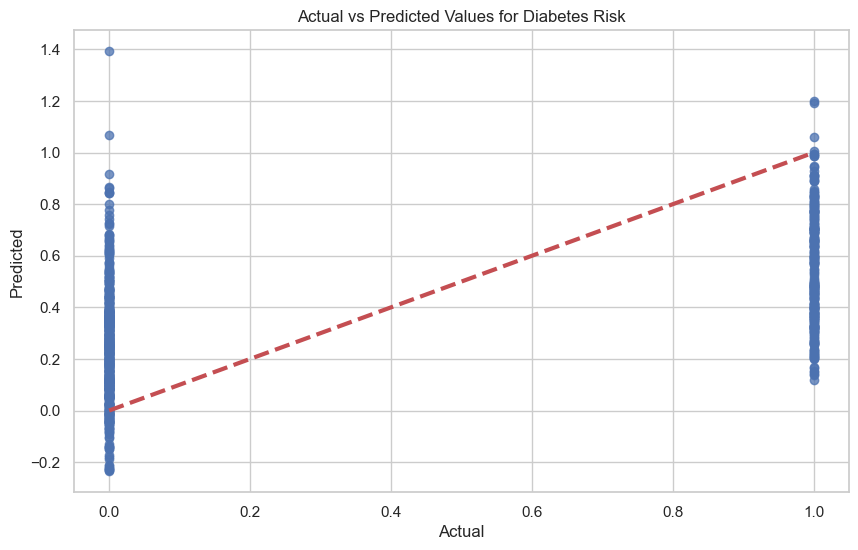

Training Mean Absolute Error: 0.33
Test Mean Absolute Error: 0.33


In [66]:
# Initialise the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model using the training data
linear_reg_model.fit(X_train, y_train)

# Predict on the training and test data
y_linear_pred_train = linear_reg_model.predict(X_train)
y_linear_pred_test = linear_reg_model.predict(X_test)

# Calculate and print performance metrics for the training set
mse_train_lin = mean_squared_error(y_train, y_linear_pred_train)
r2_train_lin = r2_score(y_train, y_linear_pred_train)
print(f"Training Mean Square Error: {mse_train_lin:.2f}")
print(f"Training R^2: {r2_train_lin:.2f}")

# Calculate and print performance metrics for the test set
mse_test_lin = mean_squared_error(y_test, y_linear_pred_test)
r2_test_lin = r2_score(y_test, y_linear_pred_test)
print(f"Test Mean Square Error: {mse_test_lin:.2f}")
print(f"Test R^2: {r2_test_lin:.2f}")

# Visualise the actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_linear_pred_test, alpha=0.75)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for Diabetes Risk')
plt.show()

# Since we are performing regression, we won't have a confusion matrix or classification report.
# Instead, we look at metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R^2).
# We will also calculate the MAE for both the training and test sets
mae_train_lin = mean_absolute_error(y_train, y_linear_pred_train)
mae_test_lin = mean_absolute_error(y_test, y_linear_pred_test)
print(f"Training Mean Absolute Error: {mae_train_lin:.2f}")
print(f"Test Mean Absolute Error: {mae_test_lin:.2f}")

**Output Analysis**:
The Training Mean Square Error (MSE) of 0.16 and the Test MSE of 0.15 indicate that the model's predictions are generally close to the actual values, with slightly better performance on the test set. A lower MSE suggests a better match.

The R-squared values are moderate (0.31 for training and 0.30 for test), indicating that the model explains roughly 30% of the variability in diabetes risk. R^2 of 1 indicates flawless prediction with no error, while 0.30 indicates significant variability not captured by the model.

The Mean Absolute Error (MAE) is the same for the training and test sets, at 0.33. MAE calculates the average magnitude of mistakes in a series of predictions without considering their direction. The fact that the MAE is the same for both indicates that the model performs consistently on both datasets.

The scatter figure reveals a substantial dispersion around the line of best fit, showing variability in the model's accuracy. Some points are closely matched with the prediction line, while others vary greatly, indicating the existence of outliers or variables not captured by the model. The vertical line of points at various anticipated values for an actual value of around 0.6 demonstrates that forecasts are spread out for this degree of real risk. 

In conclusion, the model has a limited capacity to predict diabetes risk, with identical accuracy on both the training and test sets. However, there is plenty of potential for improvement, as seen by the middling R-squared values and the dispersion of predictions in the scatter plot. The model may benefit from incorporating new variables, employing feature engineering, or utilising more complicated modeling approaches to better represent the underlying connections in the data.